In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

In [2]:
# Paths to datasets
train_dir = r"F:\KULIAH\SEMESTER 7\VISI KOMPUTER\TUBES\card_dataset\train"
test_dir = r"F:\KULIAH\SEMESTER 7\VISI KOMPUTER\TUBES\card_dataset\test"
val_dir = r"F:\KULIAH\SEMESTER 7\VISI KOMPUTER\TUBES\card_dataset\valid"

In [3]:
# Image size and parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [4]:
# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Simple preprocessing for validation and test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # Keep test order consistent for evaluation
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [5]:
# Load MobileNetV2 as base model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(53, activation="softmax")  # 52 classes for cards
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=60
)

Epoch 1/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 196s 806ms/step - accuracy: 0.0280 - loss: 4.3161 - val_accuracy: 0.1057 - val_loss: 3.5417
Epoch 2/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 135s 557ms/step - accuracy: 0.0864 - loss: 3.5931 - val_accuracy: 0.1925 - val_loss: 3.0990
Epoch 3/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 136s 560ms/step - accuracy: 0.1416 - loss: 3.2257 - val_accuracy: 0.2113 - val_loss: 2.8290
Epoch 4/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 139s 573ms/step - accuracy: 0.1839 - loss: 2.9748 - val_accuracy: 0.2755 - val_loss: 2.6408
Epoch 5/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 139s 575ms/step - accuracy: 0.2158 - loss: 2.8301 - val_accuracy: 0.2755 - val_loss: 2.5050
Epoch 6/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 140s 579ms/step - accuracy: 0.2398 - loss: 2.7020 - val_accuracy: 0.3132 - val_loss: 2.4024
Epoch 7/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 144s 595ms/step - accuracy: 0.2729 - loss: 2.5696 - val_accuracy: 0.3283 - val_loss: 2.3204
Epoch 8/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 137s 565ms/step - accuracy: 0.2983 -

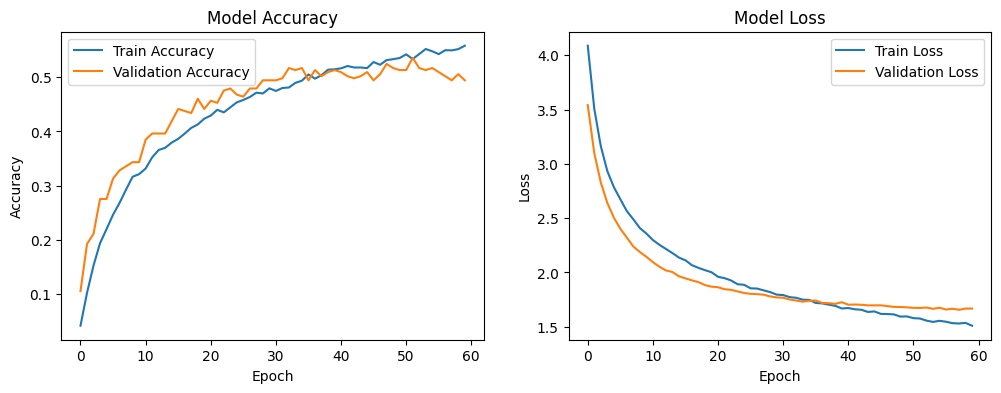

In [16]:
# Plot accuracy and loss
def plot_accuracy_loss(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)

In [8]:
# Fine-tune the model
base_model.trainable = True  # Unfreeze some layers of base model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
# Continue training with fine-tuning
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=60
)

Epoch 1/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.2041 - loss: 3.0759 - val_accuracy: 0.4264 - val_loss: 1.7032
Epoch 2/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 511s 2s/step - accuracy: 0.3263 - loss: 2.2972 - val_accuracy: 0.4830 - val_loss: 1.5788
Epoch 3/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.4069 - loss: 2.0451 - val_accuracy: 0.5019 - val_loss: 1.4986
Epoch 4/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 520s 2s/step - accuracy: 0.4472 - loss: 1.8633 - val_accuracy: 0.5623 - val_loss: 1.4310
Epoch 5/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.4689 - loss: 1.7497 - val_accuracy: 0.5849 - val_loss: 1.3544
Epoch 6/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.4967 - loss: 1.6710 - val_accuracy: 0.6113 - val_loss: 1.2727
Epoch 7/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.5296 - loss: 1.5591 - val_accuracy: 0.6189 - val_loss: 1.1852
Epoch 8/60
239/239 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.5592 - loss: 1.4749 - val_accu

In [21]:
# Save the improved model
model.save("improved_card_model_v2.keras")

In [11]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 486ms/step - accuracy: 0.8908 - loss: 0.3338

Test Accuracy: 86.04%


In [12]:
# Generate predictions for test data
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 506ms/step

Classification Report:
                   precision    recall  f1-score   support

     ace of clubs       1.00      1.00      1.00         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       0.83      1.00      0.91         5
    ace of spades       1.00      1.00      1.00         5
   eight of clubs       0.71      1.00      0.83         5
eight of diamonds       0.83      1.00      0.91         5
  eight of hearts       1.00      1.00      1.00         5
  eight of spades       1.00      1.00      1.00         5
    five of clubs       1.00      0.60      0.75         5
 five of diamonds       1.00      0.80      0.89         5
   five of hearts       0.83      1.00      0.91         5
   five of spades       0.83      1.00      0.91         5
    four of clubs       1.00      0.80      0.89         5
 four of diamonds       0.71      1.00      0.83         5
   four of hearts       1.00      0.80      0.89   

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

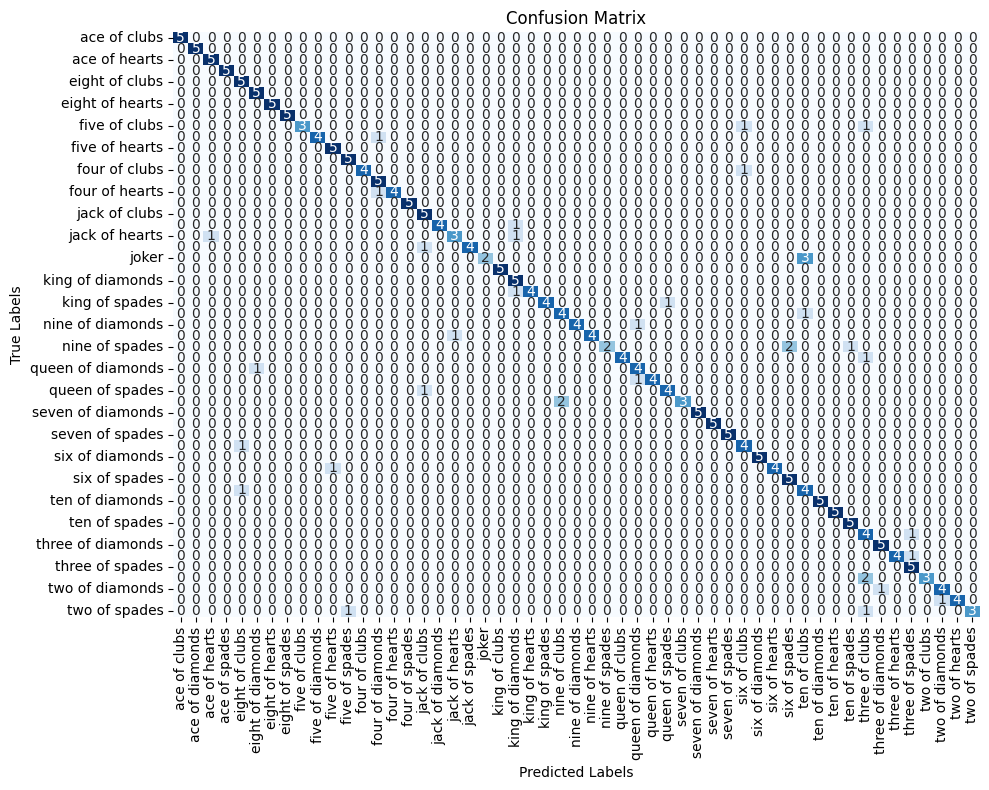

In [19]:
import seaborn as sns
import pandas as pd

# Confusion Matrix with Class Labels
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()

# Class names from the generator
class_names = list(test_data.class_indices.keys())

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)

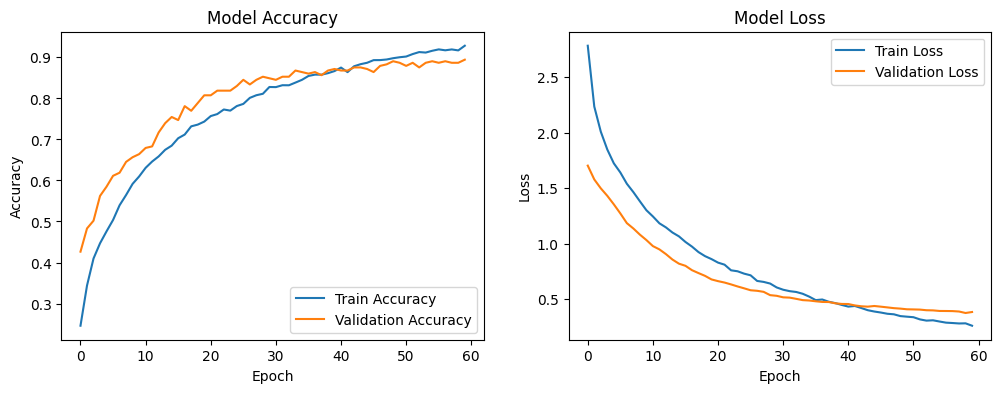

In [17]:
plot_accuracy_loss(history_fine)